# Polynomial Regression Assignment

In [1]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
from sklearn.cross_validation import train_test_split
import numpy.polynomial.polynomial as poly
%matplotlib inline

/Users/sophia.danielsen/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Importing Data 
Import data from poly_regression.csv

In [2]:
# Run the code cell
df = pd.read_csv('poly_regression.csv')
data = df.values
X = data[:,0]
Y = data[:,1]
X = X.reshape(X.shape[0],1)
Y = Y.reshape(Y.shape[0],1)

print(X)
print(Y)

[[-0.65]
 [-0.78]
 [-0.39]
 [ 0.69]
 [ 0.37]
 [-0.98]
 [-0.15]
 [ 0.95]
 [-0.9 ]
 [ 0.16]
 [-0.9 ]
 [-0.35]
 [ 0.43]
 [-0.24]
 [-0.71]
 [ 0.48]
 [ 0.11]
 [-0.87]
 [-0.44]
 [-0.41]
 [-0.49]
 [-0.41]
 [-0.96]
 [-0.05]
 [ 0.98]
 [ 0.38]
 [ 0.07]
 [-0.13]
 [-0.71]
 [ 0.05]
 [ 0.66]
 [-0.76]
 [ 0.99]
 [-0.44]
 [ 0.5 ]
 [-0.75]
 [ 0.64]
 [-0.37]
 [ 0.15]
 [ 0.85]
 [ 0.37]
 [ 0.65]
 [ 0.49]
 [ 0.01]
 [-0.4 ]
 [ 0.31]
 [-0.34]
 [-0.57]
 [ 1.  ]
 [ 0.41]
 [-0.49]
 [-0.33]
 [-0.54]
 [ 0.75]
 [-0.2 ]
 [ 0.3 ]
 [ 0.41]
 [-0.84]
 [ 0.84]
 [ 0.9 ]
 [-0.08]
 [-0.49]
 [ 0.8 ]
 [ 0.98]
 [-0.61]
 [ 0.13]
 [ 0.11]
 [-0.5 ]
 [ 0.76]
 [ 0.5 ]
 [ 0.66]
 [ 0.63]
 [ 0.55]
 [ 0.14]
 [ 0.2 ]
 [ 0.13]
 [ 0.82]
 [-0.1 ]
 [-0.75]
 [-0.67]
 [ 0.3 ]
 [-0.57]
 [ 0.58]
 [ 0.93]
 [ 0.43]
 [-0.38]
 [-0.18]
 [-0.57]
 [-0.49]
 [-0.91]
 [-0.42]
 [ 0.7 ]
 [ 0.23]
 [-0.21]
 [ 0.32]
 [-0.1 ]
 [-0.02]
 [ 0.61]
 [ 0.82]
 [-0.1 ]
 [-0.36]
 [ 0.48]
 [ 0.  ]
 [ 0.83]
 [ 0.54]
 [-0.31]
 [ 0.36]
 [ 0.88]
 [-0.24]
 [-0.06]
 [-0.21]
 

# Training and Test Set
Divide the dataset approximately into 2 equal parts : training and test set. 

In [7]:
sample_size = X.shape[0] // 2


X_tr = X[:sample_size]
Y_tr = Y[:sample_size]
X_test = X[sample_size:]
Y_test = Y[sample_size:]

#X_tr, Y_tr, X_test, Y_test = train_test_split(X, Y, test_size=0.5, random_state=2)

print("X_tr:", X_tr)
print()
print("X_test:", X_test)
print()
print("Y_tr:", Y_tr)
print()
print("Y_test:", Y_test)


X_tr: [[-0.65]
 [-0.78]
 [-0.39]
 [ 0.69]
 [ 0.37]
 [-0.98]
 [-0.15]
 [ 0.95]
 [-0.9 ]
 [ 0.16]
 [-0.9 ]
 [-0.35]
 [ 0.43]
 [-0.24]
 [-0.71]
 [ 0.48]
 [ 0.11]
 [-0.87]
 [-0.44]
 [-0.41]
 [-0.49]
 [-0.41]
 [-0.96]
 [-0.05]
 [ 0.98]
 [ 0.38]
 [ 0.07]
 [-0.13]
 [-0.71]
 [ 0.05]
 [ 0.66]
 [-0.76]
 [ 0.99]
 [-0.44]
 [ 0.5 ]
 [-0.75]
 [ 0.64]
 [-0.37]
 [ 0.15]
 [ 0.85]
 [ 0.37]
 [ 0.65]
 [ 0.49]
 [ 0.01]
 [-0.4 ]
 [ 0.31]
 [-0.34]
 [-0.57]
 [ 1.  ]
 [ 0.41]
 [-0.49]
 [-0.33]
 [-0.54]
 [ 0.75]
 [-0.2 ]
 [ 0.3 ]
 [ 0.41]
 [-0.84]
 [ 0.84]
 [ 0.9 ]
 [-0.08]
 [-0.49]
 [ 0.8 ]
 [ 0.98]
 [-0.61]
 [ 0.13]
 [ 0.11]
 [-0.5 ]
 [ 0.76]
 [ 0.5 ]
 [ 0.66]
 [ 0.63]
 [ 0.55]
 [ 0.14]
 [ 0.2 ]
 [ 0.13]
 [ 0.82]
 [-0.1 ]
 [-0.75]
 [-0.67]
 [ 0.3 ]
 [-0.57]
 [ 0.58]
 [ 0.93]
 [ 0.43]
 [-0.38]
 [-0.18]
 [-0.57]
 [-0.49]
 [-0.91]
 [-0.42]
 [ 0.7 ]
 [ 0.23]
 [-0.21]
 [ 0.32]
 [-0.1 ]
 [-0.02]
 [ 0.61]
 [ 0.82]
 [-0.1 ]]

X_test: [[-0.36]
 [ 0.48]
 [ 0.  ]
 [ 0.83]
 [ 0.54]
 [-0.31]
 [ 0.36]
 [ 0.88]
 [-0.24]
 [-

# Plotting Dataset

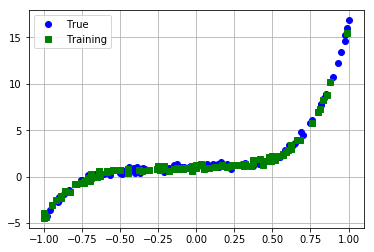

In [8]:
# Write code to plot the dataset.
plt.plot(X_tr,Y_tr,'bo')
plt.plot(X_test,Y_test,'gs')
plt.grid()
plt.legend(['True','Training','Test'],loc='upper left')

# Model Selection.
Write code to obtain polynomial regression models of different orders starting from linear regression i.e. degree = 1 to higher degree models like degree = 2 to 10. Find training and test error for every order and plot these errors v/s degree. Select the order that fits the data best based on low training and test error. You can use poly.polyval method from numpy to find coefficients of the different models.

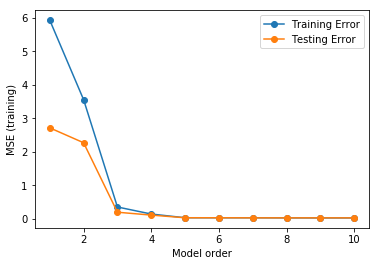

In [9]:
dtest = np.array(range(1, 11))
MSE_tr = []
MSE_test = []

X_tr = X_tr.reshape(X_tr.shape[0],)
Y_tr = Y_tr.reshape(Y_tr.shape[0],)
    
X_test = X_test.reshape(X_test.shape[0],)
Y_test = Y_test.reshape(Y_test.shape[0],)
    
for d in dtest: 
    #Training Data Error
    w_hat_tr = poly.polyfit(X_tr,Y_tr,d)
    
    yhat = poly.polyval(X_tr,w_hat_tr)
    MSEd = np.mean((yhat-Y_tr)**2)
    MSE_tr.append(MSEd)
    
    #Test Data Error
    w_hat_test = poly.polyfit(X_test,Y_test,d)
    
    yhat = poly.polyval(X_test,w_hat_test)
    MSEd = np.mean((yhat-Y_test)**2)
    MSE_test.append(MSEd)
    
#Plot Training Data Error
plt.plot(dtest,MSE_tr,'o-')
plt.xlabel('Model order')
plt.ylabel('MSE (training)')
plt.grid()
    
#Plot Test Data Error
plt.plot(dtest,MSE_test,'o-')
plt.xlabel('Model order')
plt.ylabel('MSE (training)')
plt.grid()   

plt.legend(['Training Error','Testing Error'],loc='upper right')

#d = 3 is best 